<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Visión por Computadora</center></span>
## <span style="color:red"><center>You Only Look Once</center></span>

##   <span style="color:blue">Profesores</span>

### Coordinador


- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

### Conferencistas


- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 



## <span style="color:blue">Asistentes</span>



- Nayibe Yesenia Arias, naariasc@unal.edu.co
- Venus Celeste Puertas, vpuertasg@unal.edu.co 

## <span style="color:blue">Introducción</span>

Ya hemos hablado de la tarea de Detección de objetos, sus diferencias entre modelos de clasificación, sus necesidades y sus falencias, entre otras cosas. El primer acercamiento a estas redes se hizo con la familia de Redes [R-CNN](../Cuadernos/deteccion_objetos_rcnn.ipynb) las cuales funcionan bien, pero en situaciones donde no necesitamos respuestas inmediatas o "en tiempo real". el problema es que en la actualidad, la mayoría de problemas importantes o más llamativas, se requiere trabajar con modelos en tiempo real. Es aquí donde entra la familia "You Only Look Once", con una mezcla de velocidad y precisión que lo ha puesto como el principal estado del arte 

## <span style="color:blue">fotogramas: ¿Qué son y por qué nos interesan?</span>

En el procesamiento de imágenes, no se encuentra mucha diferencia en trabajar con R-CNN y arquitecturas más avanzadas. Esto debido a que, si queremos una sola foto, no es tan importante si el resultado de la detección sale en un segundo, medio segundo o 0.1 segundos. La charla sobre la velocidad de procesamiento cobra mucho más sentido cuando estamos hablando en el reino de los videos.  Y ¿Qué es un video? una serie de imágenes en secuencia. Estas imágenes ahora tomarán el nombre de "fotograma". 

Dependiendo al número de fotogramas que pongamos en un tiempo determinado, nuestro video podrías verse más o menos fluido. Esto es lo que llamamos la "rata de fotogramas"(framerate) el cual se define en "Fotogramas por segundo" o FPS.

<figure>
<center>
<img src="../Imagenes/fps_comparison.gif" width="500" height="250" align="center"/> 
</center>
</figure>

los FPS, además de ser una herramienta publicitaria, juega un papel importante en el procesamiento de video ya que es lo que nos indica la cantidad de información que va a pasar por el modelo y, al mismo tiempo, nos da una especie de indicador para la velocidad con la que puede trabajar este.

en nuestro ejemplo de Faster R-CNN se mencionó que esta red es capaz de hacer detección en una imágen en 0.2 segundos. Si lo pasamos a términos de FPS, estos serían al rededor de 5 fotogramas en un segundo. ¿Cómo se ve eso?


[![5-FPS](https://img.youtube.com/vi/yOqNAgBHMzE/0.jpg)](https://www.youtube.com/watch?v=yOqNAgBHMzE)

Aunque ciertamente no es extremo, se puede sentir muy lento. Aquí entramos un poco a la idea de la percepción visual de los humanos. Para que un video se considere "en tiempo real" debe correr por lo menos a 20 FPS, o mejor dicho, que sea capaz de procesar una sola imagen cada 0.05 segundos. Necesitamos entonces un modelo que sea capaz de procesar imágenes 4 veces más rápido.


## <span style="color:blue">Darknet y YOLO</span>

Darknet es un framework completo de Redes neuronales desarrollado por Joseph Redmon, cuyo desarrollo empezó en 2013. Este tiene la capacidad de entrenar y hacer deployment de varias aplicaciones de Redes neuronales de una forma sencilla. El trabajo original puede verse [en la página oficial del proyecto](https://pjreddie.com/darknet/)

Sin duda el modelo que más llamó la atención del mundo fue la arquitectura conocida como "You Only Look Once" (YOLO). siendo este un modelo de detección de objetos que, cuando salió, causó furor por su poder y velocidad

### <span style="color:blue">Solo se mira una vez.....</span>

El nombre no es únicamente un nombre gracioso. tiene que ver con la forma en la que se aplicaba la detección de objetos hasta esos días. En R-CNN, por ejemplo, incialmente se proponen unas regiones donde se cree que hay objetos para luego "cortar la imagen" , y cada una de estas regiones recibía el tratamiendo de regresión y clasificación(en los casos inciiales, cada región entraba en la red convolucional de manera individual). Este estilo de detección luego recibiría el nombre de "detección a dos etapas", cosa que YOLO no hace. Estos mismos procesos suceden en un solo paso o momento.

antes de continuar con la explicación es necesario dejar unos cuantos terminos explicados

#### <span style="color:blue">Intersección sobre Unión (IOU)</span>

El IOU(por sus siglas en inglés Intersection over union) es el valor con el que observamos qué tan bien las cajas propuestas por el modelo encapsulan el area real que ocupa 

<figure>
<center>
<img src="../Imagenes/iou.png" width="700" height="350" align="center"/> 
</center>
</figure>

Este es un valor entre 0 y 1. Entre más cercano esté a 1, decimos que las areas entre el área propuesta y el área real son el mismo.

<figure>
<center>
<img src="../Imagenes/iou_example.png" width="600" height="250" align="center"/> 
</center>
</figure>


#### <span style="color:blue">Cajas Ancla</span>

Anteriormente hablamos de las "Cajas delimitadoras" y la forma en las que calculábamos su forma: Hacíamos una regresión con respecto a las coordenadas de sus extremos. El problema de esto es que este método no tiene suficiente presición, así que se usa una nueva forma de definir las cajas a utilizar: Cajas Ancla.

<figure>
<center>
<img src="../Imagenes/anchor_box.png" width="300" height="300" align="center"/> 
</center>
</figure>

Se definen unas "formas generales" de cajas para cada clase, y a la hora de generar estas en la imagen, en lugar de hacer una regresión de cajas, se toma en cuenta la clase encontrada y se le da la coordenada del centro de la caja, su altura y su anchura. Haciendo mucho más rápido este proceso.

Dentro de estas cajas ancla es de hecho donde definimos los parámetros que van a entrar a YOLO

<figure>
<center>
<img src="../Imagenes/anchor_box_2.png" width="600" height="600" align="center"/> 
</center>
</figure>

### <span style="color:blue">El algoritmo YOLOv1</span>

Estudiemos entonces el algoritmo de la primera versión de YOLO

- Creamos una malla de tamaño $S\times S$

- Cada celda de la malla detecta una clase, si el centro del objeto está en una celda, se genera un número límite de cajas ancla alrededor de este

- Se aplica supresión no máxima sobre las celdas vecinas que tienen la misma clase, para dejar solo una caja

- Cada celda hace la predicción sobre la probabilidad del objeto que entiende que está en el.


La red que utiliza YOLO es una red con 24 capas convolucionales y 2 capas completamente conectadas. La salida de esta será el número de clases que se van a trabajar. Pero este no es lla histora completa. El proceso de entrenamiento involucra el hacer un pre entrenamiento de clasificación con las redes convolucionales, pero con una única capa conectada con 1000 neuronas de salida. Luego hacen transfer learning con las capas conectadas finales.


<figure>
<center>
<img src="../Imagenes/convnet_yolo.png" width="678" height="300" align="center"/> 
</center>
</figure>

YOLOv1 fue capaz de procesar video a 21 FPS, logrando cruzar la marca del "tiempo real". Claro, tiene menos precisión, pero debido a la velocidad del modelo, el sacrificio se acepta completamente. 

<figure>
<center>
<img src="../Imagenes/yolov1_example.png" width="700" height="470" align="center"/> 
</center>
</figure>

Claro, como primera versión, esta tuvo ciertos problemas:

- La cantidad de objetos a detectar va a depender de la forma de la malla. Y ell tamaño de la malla va a implicar poder computacional
- por la naturaleza del algoritmo, se podría detectar el mismo objeto varias veces(casi completamente mítigado por la supresión no máxima)
- Ya que cada celda solo es capaz de detectar un objeto, si más de una clase se encuentra en una celda, una de las dos no será detectada.
- No trabaja muy bien con objetos pequeños.




### <span style="color:blue">Las mejoras de sus siguientes versiones</span>

En siguientes papers, se buscó diferentes mejoras al modelo, principalmente en el deployment

- YoloV2
    - Crearon su propio modelo de clasificación: Darknet 19, que obtuvo un 91% de precisión en ImageNet
    - Se cambió el método de entrenamiento
    - Agregaron capas de normalización por lotes para mejorar la velocidad
- YoloV3
    - Se usa el modelo DarkNet 53, que usa conexiones residuales
    - Se agrega un paso de regresión logística sobre las predicciónes de cada celda.
    - Se reemplazó la función de activación softmax por funciones de clasificación logísticas independientes, permitiendo clasificación multi clase.
    - Se agregaron salidas "Preliminares" de detecciones tempranas.
- YoloV4
    - Se usa el modelo  CSPDarknet 53
- YoloV5
    - ?????????

    con estas mejoras YOLO es capáz de procesar video a 45 FPS, o procesa una imagen a 0.02 segundos. Esencialmente, YOLO es 10 veces más rápido que Faster R-CNN. Esto con una mayor precisión en sus versiones más pesadas. 

## <span style="color:blue">Una implementación sencilla de YOLO</span>

Aquí es donde se entra en un problema. Estos modelos se diseñan de una forma que no es "amigable" en un contexto puramente académico.

Actualmente tenemos varias implementaciones:

La forma más "pura" de YOLO es YOLOv4, cuyo repositorio se encuentra [Aquí](https://github.com/AlexeyAB/darknet). Su implementación es completamente hecha en C y CUDA, y se basa en scripts pre hechos para aplicar los modelos y HAcer entrenamientos personalizados. 

Hay una implementación en [Pytorch](https://github.com/Tianxiaomo/pytorch-YOLOv4), pero de igual forma, Está completamente basado en scripts para todas sus funciones, no podemos con facilidad utilizar estos en un cuaderno.

A razón de esto se decide utilizar [YOLOv5](https://github.com/ultralytics/yolov5), una colección de versiones "mejoradas" de YOLOv4 escrita completamente en Pytorch, la cual de hecho podemos descargar y usar inmediatamente.

Haremos un par de pequeños ejemplos usando la versión "small" del algoritmo

In [32]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

#descargamos el modelo desde torch hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model = model.to(device)
model.eval()

Using cache found in /home/thejarmanitor/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-4-25 torch 1.12.0.dev20220314 CUDA:0 (NVIDIA GeForce RTX 2060, 5935MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

Es a partir de este punto que podemos tratar a YOLOv5 como un modelo pre entrenado. 

Un punto particularmente interesante es la función de activación que usan: SiLU(Sigmoid Linear Unit), la cual es la función sigmoide multiplicada por su propio input.

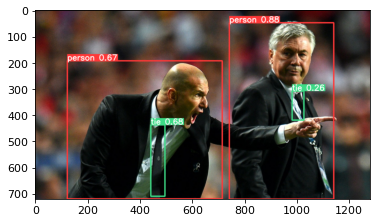

In [34]:

img = 'https://ultralytics.com/images/zidane.jpg'

results = model(img)

plt.imshow(np.squeeze(results.render()))


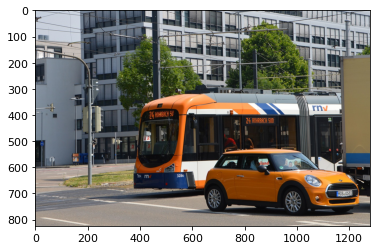

In [43]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img2 = cv2.imread('../Imagenes/source_2.png')

plt.imshow(img2[:,:,::-1])

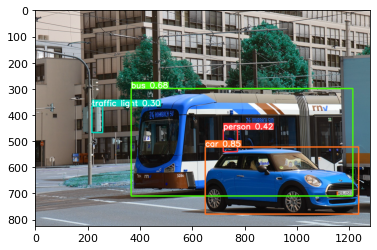

In [44]:
results = model(img2)

plt.imshow(np.squeeze(results.render()))

In [45]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,650.083130,522.961365,1236.002563,778.909973,0.847369,2,car
1,367.807190,299.686646,1214.386230,709.471130,0.675581,5,bus
2,719.255737,456.009277,773.687988,540.933960,0.424442,0,person
3,217.503525,367.223022,258.705994,467.910400,0.301747,9,traffic light


In [37]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    results = model(frame)
    
    cv2.imshow('Video', np.squeeze(results.render()))
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()